## Importing Libraries

In [ ]:
!pip install torch

In [18]:
import math
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
from torch.autograd import Variable
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Loading Dataset

In [19]:
df = pd.read_excel('data/gold_prices.xlsx')
df

,Name,US dollar,Euro,Japanese yen,Pound sterling,Canadian dollar,Swiss franc,Indian rupee,Chinese renmimbi,US dollar.1,...,Vietnamese dong,Egyptian pound,Korean won,Euro.1,Russian ruble,US dollar.2,South African rand,Chinese renmimbi.1,Canadian dollar.1,Australian dollar
0,1978-12-29,226.00,137.06,NaN,110.70,NaN,NaN,NaN,NaN,226.00,...,NaN,NaN,NaN,137.06,NaN,226.00,NaN,NaN,NaN,NaN
1,1979-01-01,226.00,137.06,NaN,110.70,NaN,NaN,NaN,NaN,226.00,...,NaN,NaN,NaN,137.06,NaN,226.00,NaN,NaN,NaN,NaN
2,1979-01-02,226.80,137.29,43164.91,111.45,263.74,359.62,1792.85,NaN,226.80,...,NaN,NaN,107470.04,137.29,NaN,226.80,194.56,NaN,263.74,193.61
3,1979-01-03,218.60,134.01,43717.90,107.98,264.39,365.87,1802.15,NaN,218.60,...,NaN,NaN,108027.43,134.01,NaN,218.60,192.23,NaN,264.39,192.97
4,1979-01-04,223.15,136.79,43674.89,110.66,264.14,366.38,1811.74,NaN,223.15,...,NaN,NaN,108602.47,136.79,NaN,223.15,193.01,NaN,264.14,194.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10896,2020-10-05,1909.60,1619.33,201739.71,1471.41,2533.08,1747.09,139954.58,13005.52,1909.60,...,44310360.67,30057.11,2221724.14,1619.33,149390.40,1909.60,31453.51,13005.52,2533.08,2655.73
10897,2020-10-06,1913.40,1622.69,202083.74,1475.02,2537.93,1749.04,140560.73,13031.40,1913.40,...,44405228.23,30088.21,2221457.29,1622.69,149144.85,1913.40,31569.96,13031.40,2537.93,2671.41
10898,2020-10-07,1884.50,1602.26,199804.10,1460.97,2503.65,1728.18,138176.24,12834.58,1884.50,...,43730764.75,29551.31,2182533.49,1602.26,147410.31,1884.50,31373.43,12834.58,2503.65,2640.10
10899,2020-10-08,1887.45,1606.54,200116.87,1459.86,2496.06,1732.21,138241.54,12854.67,1887.45,...,43773739.27,29651.84,2176701.66,1606.54,146305.68,1887.45,31298.65,12854.67,2496.06,2637.02


In [20]:
df.columns

Index(['Name', 'US dollar', 'Euro', 'Japanese yen', 'Pound sterling',
       'Canadian dollar', 'Swiss franc', 'Indian rupee', 'Chinese renmimbi',
       'US dollar.1', 'Turkish lira', 'Saudi riyal', 'Indonesian rupiah',
       'UAE dirham', 'Thai baht', 'Vietnamese dong', 'Egyptian pound',
       'Korean won', 'Euro.1', 'Russian ruble', 'US dollar.2',
       'South African rand', 'Chinese renmimbi.1', 'Canadian dollar.1',
       'Australian dollar'],
      dtype='object')

In [21]:
df = df.rename(columns={'Name':'Date'})
df = df[['Date', 'Indonesian rupiah']]
df = df.set_index('Date')
df

,Indonesian rupiah
Date,
1978-12-29,NaN
1979-01-01,NaN
1979-01-02,138160.45
1979-01-03,138877.01
1979-01-04,139616.26
...,...
2020-10-05,28262081.45
2020-10-06,28193947.56
2020-10-07,27720995.00


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10901 entries, 1978-12-29 to 2020-10-09
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Indonesian rupiah  10899 non-null  float64
dtypes: float64(1)
memory usage: 170.3 KB


In [23]:
df.describe(include='all')

,Indonesian rupiah
count,1.089900e+04
mean,5.803353e+06
std,6.825054e+06
min,1.351224e+05
25%,6.966570e+05
50%,2.479962e+06
75%,1.093471e+07
max,3.014938e+07


In [24]:
df.isna().sum()

Indonesian rupiah    2
dtype: int64

In [25]:
df = df.dropna(how='any')

## Visualizing the dataset

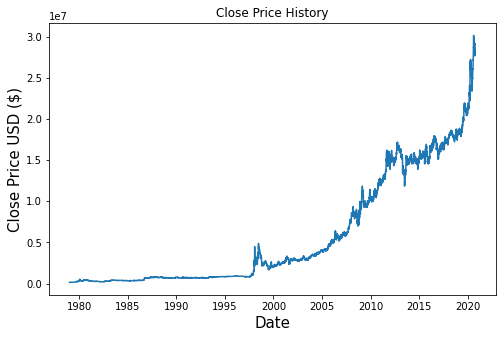

In [26]:
plt.figure(figsize=(8,5))
plt.title('Close Price History')
plt.plot(df['Indonesian rupiah'])
plt.xlabel('Date', fontsize=15)
plt.ylabel('Close Price USD ($)', fontsize=15)
plt.show()

## Data Preprocessing

### Determining the used data

### Scaling the dataset

In [27]:
scaler = MinMaxScaler(feature_range=(0,1))
data_scaled = scaler.fit_transform(df)
data_scaled

array([[1.01220224e-04],
       [1.25094210e-04],
       [1.49724170e-04],
       ...,
       [9.19092244e-01],
       [9.20538016e-01],
       [9.37442856e-01]])

In [30]:
def sliding_windows(data, seq_length):
    x = []
    y = []

    for i in range(len(data)-seq_length-1):
        _x = data[i:(i+seq_length)]
        _y = data[i+seq_length]
        x.append(_x)
        y.append(_y)

    return np.array(x),np.array(y)

(array([[[1.01220224e-04],
         [1.25094210e-04],
         [1.49724170e-04],
         ...,
         [1.56970726e-04],
         [7.49447123e-05],
         [0.00000000e+00]],
 
        [[1.25094210e-04],
         [1.49724170e-04],
         [2.31446661e-04],
         ...,
         [7.49447123e-05],
         [0.00000000e+00],
         [3.66669056e-05]],
 
        [[1.49724170e-04],
         [2.31446661e-04],
         [2.24843133e-04],
         ...,
         [0.00000000e+00],
         [3.66669056e-05],
         [1.51719555e-04]],
 
        ...,
 
        [[9.34392139e-01],
         [9.20205867e-01],
         [9.19107654e-01],
         ...,
         [9.35590236e-01],
         [9.37694360e-01],
         [9.37119891e-01]],
 
        [[9.20205867e-01],
         [9.19107654e-01],
         [9.16851418e-01],
         ...,
         [9.37694360e-01],
         [9.37119891e-01],
         [9.34849840e-01]],
 
        [[9.19107654e-01],
         [9.16851418e-01],
         [9.20993865e-01],
         

In [ ]:
seq_length = 5
x, y = sliding_windows(data_scaled, seq_length)

train_size = int(len(y) * 0.70)
test_size = len(y) - train_size

dataX = Variable(torch.Tensor(np.array(x)))
dataY = Variable(torch.Tensor(np.array(y)))

trainX = Variable(torch.Tensor(np.array(x[0:train_size])))
trainY = Variable(torch.Tensor(np.array(y[0:train_size])))

testX = Variable(torch.Tensor(np.array(x[train_size:len(x)])))
testY = Variable(torch.Tensor(np.array(y[train_size:len(y)])))

In [ ]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size))
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size)
        
        out = self.fc(h_out)
        
        return out

In [ ]:
num_epochs = 2000
learning_rate = 0.01

input_size = 1
hidden_size = 2
num_layers = 1

num_classes = 1

lstm = LSTM(num_classes, input_size, hidden_size, num_layers)

criterion = torch.nn.MSELoss()    # mean-squared error for regression
optimizer = torch.optim.Adam(lstm.parameters(), lr=learning_rate)
#optimizer = torch.optim.SGD(lstm.parameters(), lr=learning_rate)

# Train the model
for epoch in range(num_epochs):
    outputs = lstm(trainX)
    optimizer.zero_grad()
    
    # obtain the loss function
    loss = criterion(outputs, trainY)
    
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
      print("Epoch: %d, loss: %1.5f" % (epoch, loss.item()))

In [ ]:
lstm.eval()
train_predict = lstm(dataX)

data_predict = train_predict.data.numpy()
dataY_plot = dataY.data.numpy()

data_predict = scaler.inverse_transform(data_predict)
dataY_plot = scaler.inverse_transform(dataY_plot)

plt.axvline(x=train_size, c='r', linestyle='--')

plt.plot(dataY_plot)
plt.plot(data_predict)
plt.suptitle('Time-Series Prediction')
plt.show()